In [1]:
# Base & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('hls', n_colors=10)
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

# Model
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Scoring
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

# Data Load

In [2]:
train_emp = pd.read_csv('data/employee_feature_train.csv').iloc[:,1:]
test_emp = pd.read_csv('data/employee_feature_test.csv').iloc[:,1:]
target_emp = train_emp.prime_yn

train_emp.drop(columns=['prime_yn'], inplace=True)
test_emp.drop(columns=['prime_yn'], inplace=True)

#### Feature 자료형 구분

In [3]:
cat_features = train_emp.select_dtypes('object').columns.tolist()
num_features = train_emp.select_dtypes('float').columns.tolist()+train_emp.select_dtypes('int').columns.tolist()

# Base Model 생성 및 학습

In [4]:
catb = CatBoostClassifier(cat_features=cat_features, random_state=0, silent=True)
lgbm = LGBMClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)

catb.fit(train_emp, target_emp)
lgbm.fit(train_emp[num_features], target_emp)
rf.fit(train_emp[num_features], target_emp)

RandomForestClassifier(random_state=0)

# Feature Importance Visualization

### Catboost

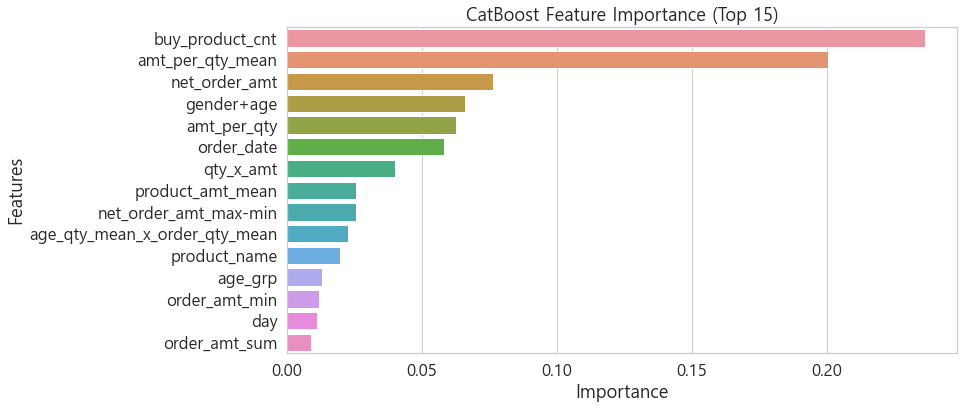

In [5]:
# Feature Importance 확인
cat_feature_importances = catb.feature_importances_ / sum(catb.feature_importances_)
indices = np.argsort(cat_feature_importances)
cat_feature_names = [train_emp.columns[i] for i in indices]

df = pd.DataFrame({'Features': cat_feature_names[-15:], 'Importance': cat_feature_importances[indices][-15:]})

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df, y='Features', x='Importance', orient='h', order=df.sort_values('Importance', ascending=False)['Features'])
plt.title('CatBoost Feature Importance (Top 15)')
plt.show()

### LGBM

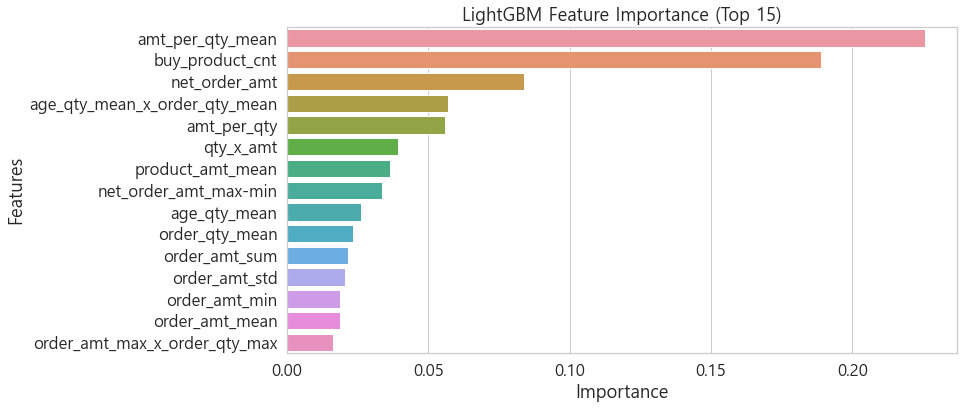

In [6]:
# Feature Importance 확인
lgbm_feature_importances = lgbm.feature_importances_ / sum(lgbm.feature_importances_)
indices = np.argsort(lgbm_feature_importances)
lgbm_feature_names = [train_emp[num_features].columns[i] for i in indices]

df = pd.DataFrame({'Features': lgbm_feature_names[-15:], 'Importance': lgbm_feature_importances[indices][-15:]})

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df, y='Features', x='Importance', orient='h', order=df.sort_values('Importance', ascending=False)['Features'])
plt.title('LightGBM Feature Importance (Top 15)')
plt.show()

### RandomForest

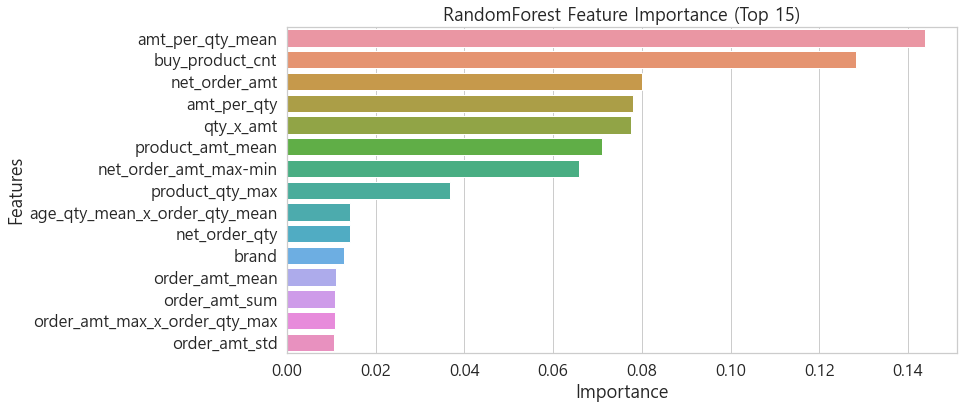

In [7]:
rf_feature_importances = rf.feature_importances_
indices = np.argsort(rf_feature_importances)
rf_feature_names = [train_emp[num_features].columns[i] for i in indices]

df = pd.DataFrame({'Features': rf_feature_names[-15:], 'Importance': rf_feature_importances[indices][-15:]})

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df, y='Features', x='Importance', orient='h', order=df.sort_values('Importance', ascending=False)['Features'])
plt.title('RandomForest Feature Importance (Top 15)')
plt.show()